# **The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).**

#Using the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [7]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
#method used to compute the correlation between columns in a pandas DataFrame
df.corr()

<ipython-input-8-0da33a4e28fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [9]:
#converting categorical to numerical
def converter(s):
  s = s.lower()
  if s == 'iris-setosa':
    return 0
  elif s == 'iris-versicolor':
    return 1
  elif s == 'iris-virginica':
    return 2
  else:
    return -1

In [10]:
df = pd.read_csv(r'/content/drive/MyDrive/IRIS.csv',converters = {"species":converter})

In [11]:
df.shape

(150, 5)

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

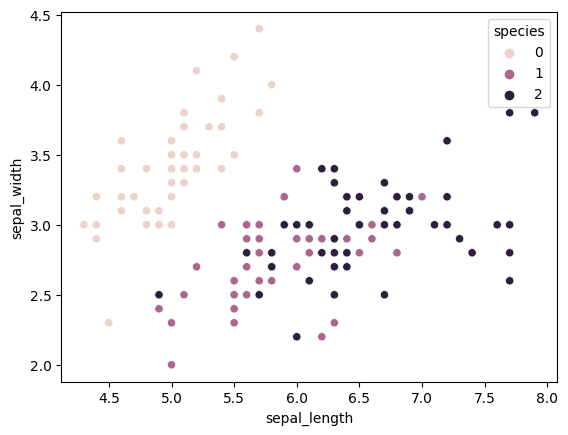

In [14]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

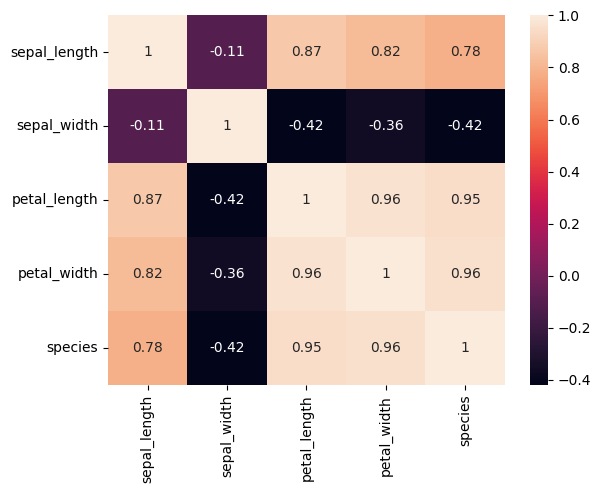

In [15]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [18]:
features = df[['sepal_length','sepal_width','petal_length','petal_width']]
labels = df["species"]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3)

# **Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
#print intercept
print(lr.intercept_)

0.3087448041267743


In [22]:
predictions=lr.predict(X_test)

In [23]:
print('MAE :',metrics.mean_absolute_error(y_test,predictions))
print('MSE :',metrics.mean_squared_error(y_test,predictions))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE : 0.18114249917819653
MSE : 0.05252979906517588
RMSE : 0.2291938024144106


# **Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(features, labels)
labels_pred = logreg.predict(features)
print(metrics.accuracy_score(labels, labels_pred))

0.9733333333333334


## **KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9777777777777777

# **Naive** **Bayes**

In [26]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [27]:
y_pred = NB.predict(X_test)
y_pred

array([0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2,
       1])

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.9333333333333333


# Naive Bayes Classifier Got the Highest Accuracy of 100%. So using that model for prediction of the Iris Flower Species

In [29]:
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))
if prediction[0] == 0:
  print("Iris - Setosa")
if prediction[0] == 1:
  print("Iris - Versicolor")
if prediction[0] == 2:
  print("Iris - Virginica")

Prediction: [0]
Iris - Setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
